### Data Preprocessing for Text(Basic)

* Bag Of Words Methods 
    * CountVectorizer
    * TfId Vectorizer
    * HashingVectorizer
* NLTK Package for Stemming & Lemmetization
    * Understanding Package
    * Stemming 
    * Lemmetization
    

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame({'Text':[
    'Hello How are you',
    'Great stuff buddy',
    'How are things',
    'Awesome stuff Awesome'
],'Info':[11,22,44,21]
})

In [5]:
df

,Text,Info
0,Hello How are you,11
1,Great stuff buddy,22
2,How are things,44
3,Awesome stuff Awesome,21


### Points to understand
* Text Data cannot be used in ML models 
* They needs to be converted into vectors

### CountVectorizer
* Each word is assigned a column
* Value in the column represents the count of that word in the text row known as document
* Each row is known as document.
* Combination of these documents is known as corpus

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
cv = CountVectorizer()

In [8]:
cv.fit(df.Text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [9]:
cv.vocabulary_

{'hello': 4,
 'how': 5,
 'are': 0,
 'you': 8,
 'great': 3,
 'stuff': 6,
 'buddy': 2,
 'things': 7,
 'awesome': 1}

In [10]:
res = cv.transform(df.Text).toarray()

In [11]:
res.shape

(4, 9)

In [13]:
map_df = pd.DataFrame(res)

In [15]:
cols = map(lambda x:x[0],sorted(list(cv.vocabulary_.items())))

In [16]:
map_df.columns = cols

In [17]:
map_df

,are,awesome,buddy,great,hello,how,stuff,things,you
0,1,0,0,0,1,1,0,0,1
1,0,0,1,1,0,0,1,0,0
2,1,0,0,0,0,1,0,1,0
3,0,2,0,0,0,0,1,0,0


In [18]:
cv.transform(['you are great']).toarray()

array([[1, 0, 0, 1, 0, 0, 0, 0, 1]], dtype=int64)

In [19]:
cv.transform(['you are great coder']).toarray()

array([[1, 0, 0, 1, 0, 0, 0, 0, 1]], dtype=int64)

In [20]:
map_df['Info'] = df.Info

In [21]:
map_df

,are,awesome,buddy,great,hello,how,stuff,things,you,Info
0,1,0,0,0,1,1,0,0,1,11
1,0,0,1,1,0,0,1,0,0,22
2,1,0,0,0,0,1,0,1,0,44
3,0,2,0,0,0,0,1,0,0,21


In [36]:
cv = CountVectorizer(stop_words=['hello'])

In [37]:
cv.fit(df.Text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=['hello'],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [38]:
cv.vocabulary_

{'how': 4,
 'are': 0,
 'you': 7,
 'great': 3,
 'stuff': 5,
 'buddy': 2,
 'things': 6,
 'awesome': 1}

* At very high dimension(number of features), estimators/algorithms don't work well
* Number of possibility of words increases dimension of data
* stop_words reduces the dimension
* stop_words = 'english' automactically
* Another technique is vocabolary

In [26]:
cv  = CountVectorizer(stop_words='english')

In [27]:
cv.fit(df.Text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [28]:
cv.vocabulary_

{'hello': 3, 'great': 2, 'stuff': 4, 'buddy': 1, 'things': 5, 'awesome': 0}

In [29]:
cv.transform(df.Text).toarray()

array([[0, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [2, 0, 0, 0, 1, 0]], dtype=int64)

In [7]:
cv = CountVectorizer(vocabulary=['great','buddy','awesome'])

In [8]:
cv.fit(df.Text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=['great', 'buddy', 'awesome'])

In [9]:
cv.vocabulary_

{'great': 0, 'buddy': 1, 'awesome': 2}

In [10]:
cv.transform(df.Text).toarray()

array([[0, 0, 0],
       [1, 1, 0],
       [0, 0, 0],
       [0, 0, 2]], dtype=int64)

* Sometimes combination of words are important than singular words

In [11]:
cv = CountVectorizer(ngram_range=[1,2],stop_words='english')#Setting the vocabulary explicitly means no vocabulary is learned from data. If you don't set it, you get:

In [12]:
cv.fit(df.Text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=[1, 2], preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [13]:
cv.vocabulary_

{'hello': 5,
 'great': 3,
 'stuff': 6,
 'buddy': 2,
 'great stuff': 4,
 'stuff buddy': 8,
 'things': 9,
 'awesome': 0,
 'awesome stuff': 1,
 'stuff awesome': 7}

In [14]:
cv.transform(df.Text).toarray()

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [2, 1, 0, 0, 0, 0, 1, 1, 0, 0]], dtype=int64)

In [22]:
res=cv.transform(df.Text).toarray()

In [23]:
col = list(map(lambda x:x[0],sorted(list(cv.vocabulary_.items()))))

In [25]:
dat = pd.DataFrame(res,columns=col)

In [26]:
dat

,awesome,awesome stuff,buddy,great,great stuff,hello,stuff,stuff awesome,stuff buddy,things
0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,1,1,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,1
3,2,1,0,0,0,0,1,1,0,0


### TF -IDF Vectorizer
* It is measure of originality of word by comparing the number of times a word apprears in docs with the number of times the word appears in a corpus
* Let's assume you have 1000 docs(each text) in the corpus (contains all the docs).
* Words like 'is','the','are' appears in all the docs.
* Words like 'nuclear','prime-minister' apprears only in few docs but multiple times.
* TF-IDF = TF(t,d)*IDF(t)
* IDF(t)=log(1+no. of doc/1+df(d,t)+1)

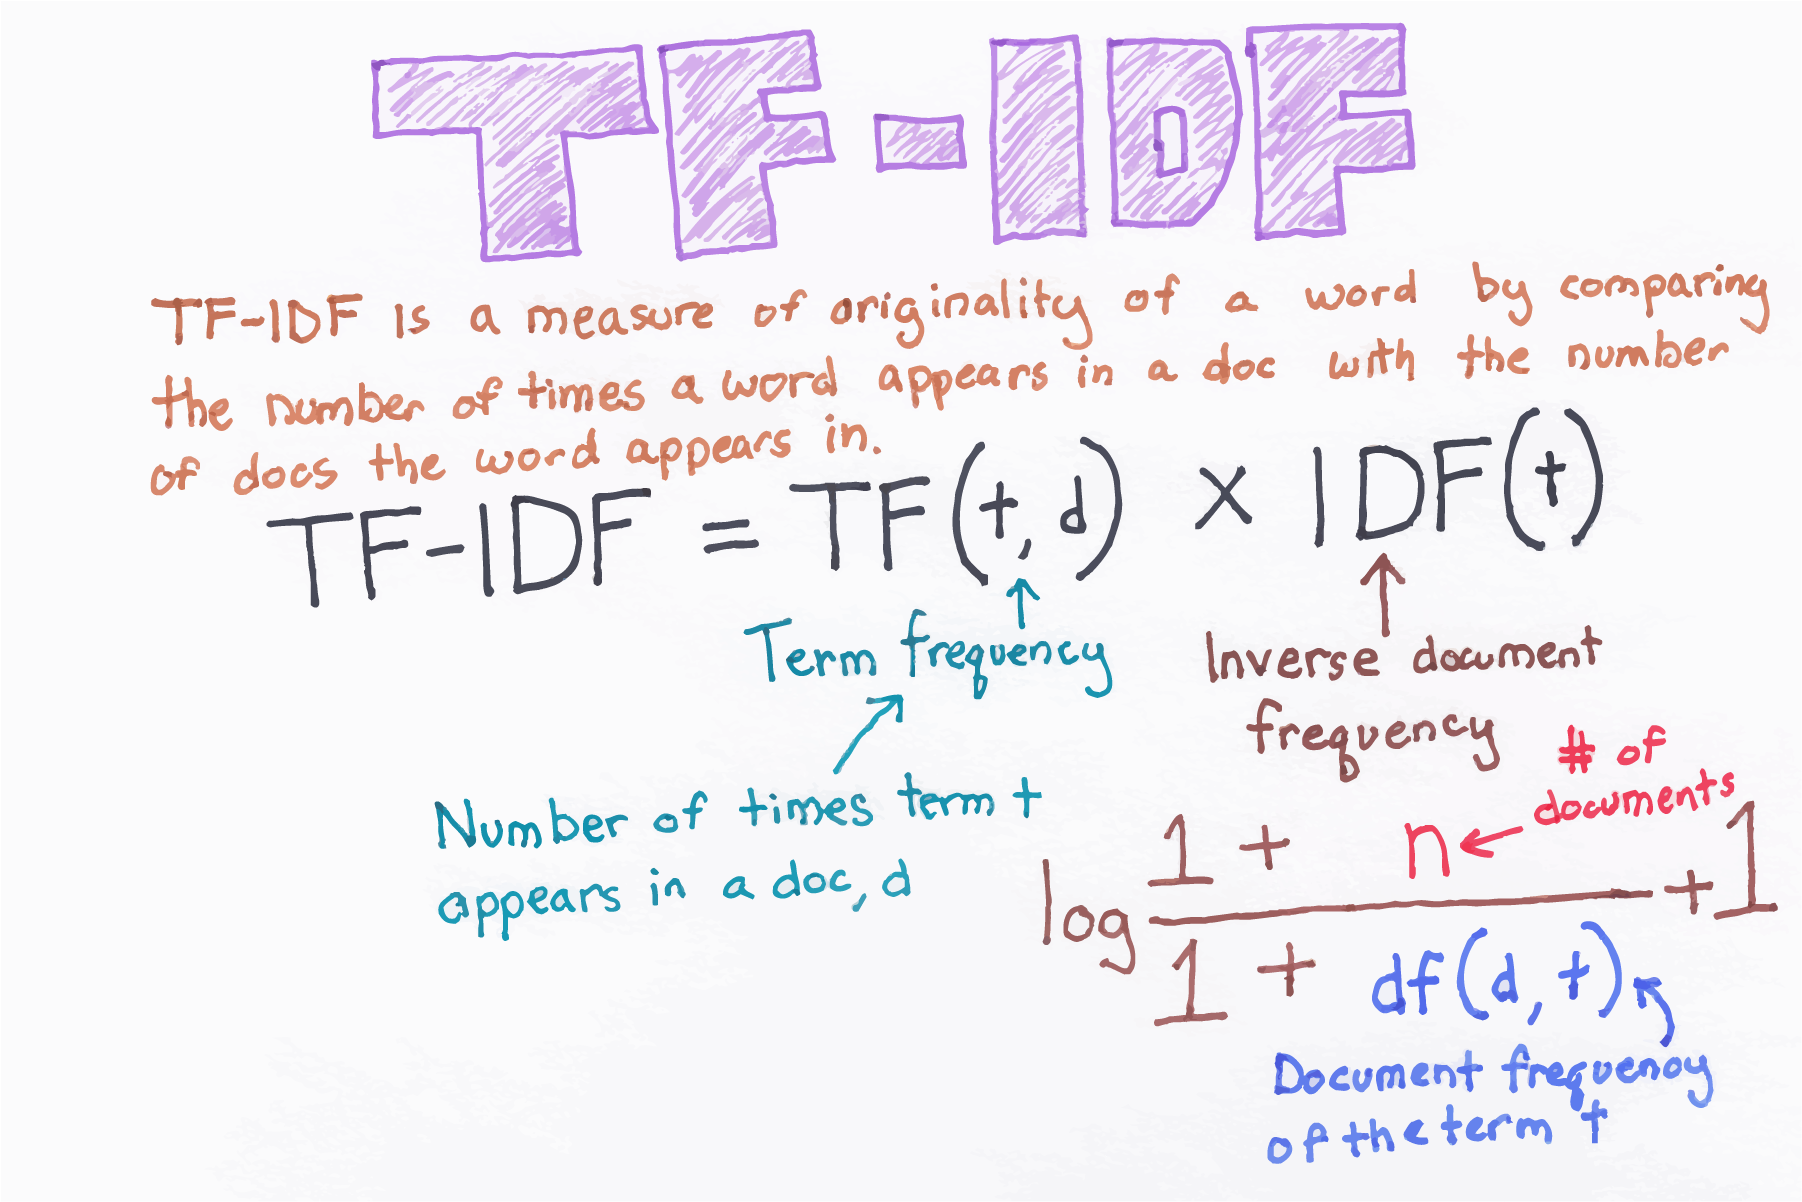

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidf = TfidfVectorizer(stop_words='english')

In [18]:
tfidf.fit(df.Text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [19]:
import numpy as np

In [20]:
np.round(tfidf.transform(df.Text).toarray(),2)

array([[0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.62, 0.62, 0.  , 0.49, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.93, 0.  , 0.  , 0.  , 0.37, 0.  ]])

In [21]:
tfidf.vocabulary_

{'hello': 3, 'great': 2, 'stuff': 4, 'buddy': 1, 'things': 5, 'awesome': 0}

In [32]:
rs = np.round(tfidf.transform(df.Text).toarray(),2)

In [33]:
col = list(map(lambda x:x[0],sorted(list(tfidf.vocabulary_.items()))))

In [34]:
data = pd.DataFrame(rs,columns=col)

In [35]:
data

,awesome,buddy,great,hello,stuff,things
0,0.00,0.00,0.00,1.0,0.00,0.0
1,0.00,0.62,0.62,0.0,0.49,0.0
2,0.00,0.00,0.00,0.0,0.00,1.0
3,0.93,0.00,0.00,0.0,0.37,0.0


### Hashing Vectorizer
* The above two approaches builds feature with high dimension
* Using HashingVectorizer you can restrict the number of dimensions
* Useful when the data is of very high dimension

In [36]:
from sklearn.feature_extraction.text import HashingVectorizer

In [37]:
hv = HashingVectorizer(n_features=4)

In [38]:
hv.fit(df.Text)

HashingVectorizer(alternate_sign=True, analyzer='word', binary=False,
                  decode_error='strict', dtype=<class 'numpy.float64'>,
                  encoding='utf-8', input='content', lowercase=True,
                  n_features=4, ngram_range=(1, 1), norm='l2',
                  preprocessor=None, stop_words=None, strip_accents=None,
                  token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None)

In [40]:
hv.transform(df.Text).toarray()

array([[ 0.81649658, -0.40824829,  0.        ,  0.40824829],
       [ 0.57735027, -0.57735027,  0.57735027,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.4472136 ,  0.        ,  0.89442719]])

### NLTK [ Natural Language Toolkit]
* Install NLTK Library
* run,ran,runs & running can be mapped into column